In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-experience-dataset/customer_experience_data.csv


In [38]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [39]:
import pandas as pd

# Veri setini yükleyelim
df = pd.read_csv('/kaggle/input/customer-experience-dataset/customer_experience_data.csv')

# İlk 5 satırı görüntüleyelim
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [40]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("Dosya yolu:", os.path.join(dirname, filename))

Dosya yolu: /kaggle/input/customer-experience-dataset/customer_experience_data.csv


In [41]:
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Location                     object
Num_Interactions              int64
Feedback_Score                int64
Products_Purchased            int64
Products_Viewed               int64
Time_Spent_on_Site          float64
Satisfaction_Score            int64
Retention_Status             object
Gender_Encoded                int64
Location_Encoded              int64
Retention_Status_Encoded      int64
dtype: object

In [42]:
# Sayısal değişkenlerin istatistiksel özeti
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


###  Sayısal Değişkenlere Derinlemesine Bakış | Deeper Insights into Numerical Features

**TR:**  
- Müşteri yaşı oldukça değişken (standart sapma ~15), bu da farklı yaş gruplarına hitap edildiğini gösterir.  
- Ürün izleme sayısı yüksek (ortalama 27.3), bu da müşterilerin karar vermeden önce yoğun araştırma yaptığını gösterir.  
- Feedback_Score ortalaması 3, müşteri deneyiminin ortalama düzeyde olduğunu ve iyileştirmeye açık olduğunu göstermektedir.  
- Satisfaction_Score ortalaması 5.5 → Müşteri memnuniyetinde geliştirilebilir alan mevcut.

**EN:**  
- The age distribution shows high variability (std ~15), indicating a diverse customer base.  
- The average number of products viewed is relatively high (27.3), suggesting customers engage in detailed research before making a decision.  
- The average feedback score is 3, reflecting a neutral experience that may require improvement.  
- The average satisfaction score is 5.5 → There’s room for improving customer satisfaction.


###  Eksik Veri Analizi | Missing Value Analysis

In [43]:
# Eksik değer sayısı
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64

In [44]:
# Eksik değerlerin yüzde oranı
df.isnull().mean() * 100

Customer_ID                 0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Num_Interactions            0.0
Feedback_Score              0.0
Products_Purchased          0.0
Products_Viewed             0.0
Time_Spent_on_Site          0.0
Satisfaction_Score          0.0
Retention_Status            0.0
Gender_Encoded              0.0
Location_Encoded            0.0
Retention_Status_Encoded    0.0
dtype: float64

**TR:** Age ve Time_Spent_on_Site sütunlarında rastgele oluşturduğum eksik veriler, veri analizinde eksik veri stratejilerini uygulamak için kullanılmıştır.

**EN:** Randomly created missing values in the Age and Time_Spent_on_Site columns were used to simulate real-world missing data and apply imputation strategies.


In [45]:
# Orijinal veri setini koruyalım
df_original = df.copy()
# Orijinal haline dönmek için
#df = df_original.copy()

In [46]:
# Örnek: Age sütunundaki rastgele 10 gözlemi eksik yapalım
df.loc[df.sample(10).index, 'Age'] = np.nan

# Aynı şekilde Time_Spent_on_Site'ta da 10 eksik veri olsun
df.loc[df.sample(10).index, 'Time_Spent_on_Site'] = np.nan

In [47]:
df.isnull().sum()

Customer_ID                  0
Age                         10
Gender                       0
Location                     0
Num_Interactions             0
Feedback_Score               0
Products_Purchased           0
Products_Viewed              0
Time_Spent_on_Site          10
Satisfaction_Score           0
Retention_Status             0
Gender_Encoded               0
Location_Encoded             0
Retention_Status_Encoded     0
dtype: int64

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [49]:
df['Time_Spent_on_Site'] = df['Time_Spent_on_Site'].fillna(df['Time_Spent_on_Site'].median())

###  Eksik Değerlerin Giderilmesi | Missing Value Imputation

**TR:** Age sütunundaki eksik veriler, ortalama yaş değeri ile doldurulmuştur.  
Time_Spent_on_Site sütunundaki eksik değerler ise dağılımın etkilenmemesi için medyan ile tamamlanmıştır.

**EN:** Missing values in the Age column were filled with the mean value.  
For Time_Spent_on_Site, the median was used to avoid the influence of outliers.


### Veri Görselleştirme | Data Visualization

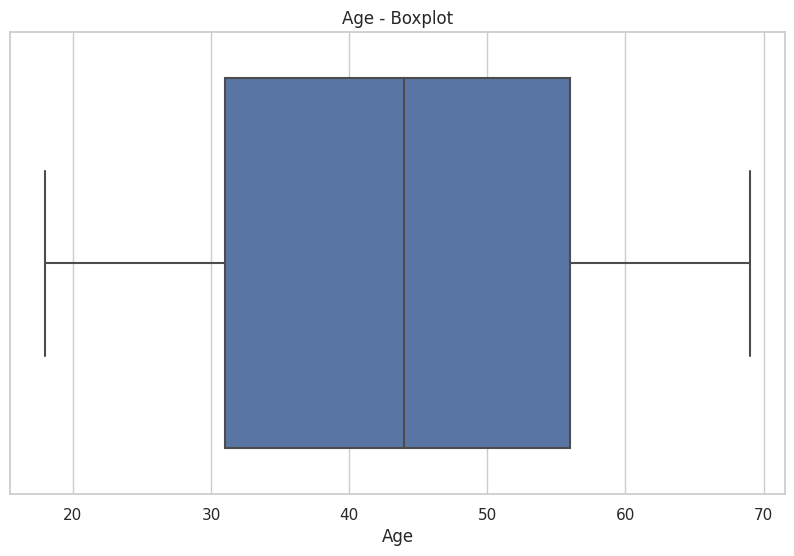

In [50]:
sns.boxplot(x=df['Age'])
plt.title("Age - Boxplot")
plt.show()

### Aykırı Değer Analizi | Outlier Analysis

**TR:** Age değişkenine ait boxplot grafiğinde veri simetrik dağılmış ve medyan kutunun ortasında yer almıştır. Grafik üzerinde herhangi bir aykırı değer gözlemlenmemiştir. Bu durum, yaş verisinin istatistiksel olarak dengeli ve temiz olduğunu göstermektedir.

**EN:** The boxplot of the Age variable shows a symmetric distribution with the median centered within the box. No outliers were observed in the visualization, indicating that the age data is statistically balanced and clean.


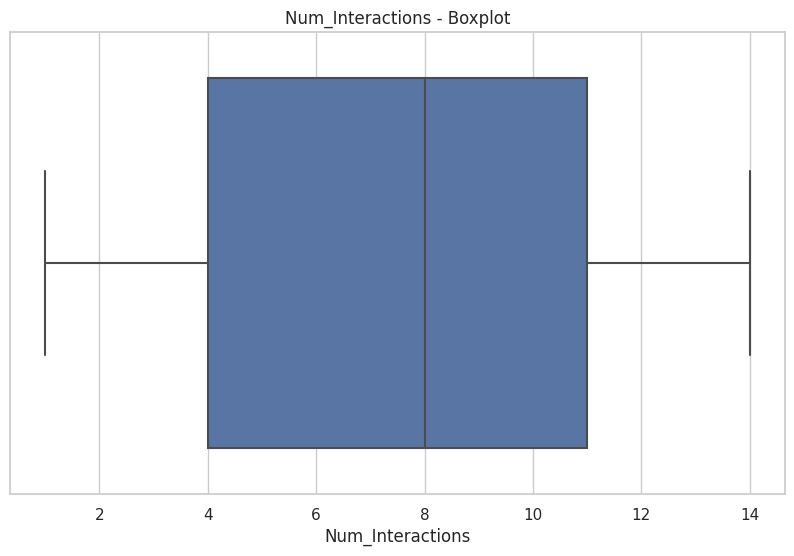

In [51]:
sns.boxplot(x=df['Num_Interactions'])
plt.title("Num_Interactions - Boxplot")
plt.show()

###  Num_Interactions - Aykırı Değer Analizi | Outlier Analysis

**TR:** Num_Interactions sütununa ait boxplot grafiğinde herhangi bir aykırı değer gözlemlenmemiştir. Ancak medyan değerin kutunun ortasında değil, biraz sağa kaymış olması verinin sola çarpık dağıldığını göstermektedir. Bu durum, müşteri etkileşim sayılarında düşük değerlerin sınırlı sayıda bulunduğuna işaret etmektedir.

**EN:** The boxplot for the Num_Interactions variable shows no visible outliers. However, the median is slightly shifted to the right, suggesting a left-skewed distribution. This indicates that while most customers have moderate to high interaction counts, there are a few with lower counts pulling the distribution slightly.


**İstatistiksel Yöntem: IQR (Interquartile Range)**

In [52]:
#Aykırı değer = Q1 - 1.5 * IQR altındaki ya da Q3 + 1.5 * IQR üstündeki değerlerdir.
Q1 = df['Products_Viewed'].quantile(0.25)
Q3 = df['Products_Viewed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Products_Viewed'] < lower_bound) | (df['Products_Viewed'] > upper_bound)]

print("Aykırı değer sayısı:", len(outliers))
print("Alt sınır:", lower_bound)
print("Üst sınır:", upper_bound)

Aykırı değer sayısı: 0
Alt sınır: -14.5
Üst sınır: 69.5


###  Products_Viewed - IQR Aykırı Değer Analizi | Outlier Detection (IQR)

**TR:** Products_Viewed sütununa IQR yöntemi uygulanarak aykırı değer analizi yapılmıştır. Alt sınır -14.5 ve üst sınır 69.5 olarak hesaplanmış, bu aralık dışında kalan hiçbir gözlem bulunmamıştır. Bu da verinin bu değişken özelinde dengeli ve temiz olduğunu gösterir.

**EN:** The IQR method was applied to the Products_Viewed column. The lower bound was -14.5 and the upper bound was 69.5. Since all values fall within this range, no outliers were detected. This indicates that the variable is well-distributed and clean.


###  Veri Görselleştirme | Data Visualization


In [53]:
# Gender
print("Gender dağılımı:")
print(df['Gender'].value_counts())

# Location
print("\nLocation dağılımı:")
print(df['Location'].value_counts())

# Retention_Status
print("\nRetention Status dağılımı:")
print(df['Retention_Status'].value_counts())

Gender dağılımı:
Gender
Male      524
Female    476
Name: count, dtype: int64

Location dağılımı:
Location
Urban       344
Suburban    344
Rural       312
Name: count, dtype: int64

Retention Status dağılımı:
Retention_Status
Retained    694
Churned     306
Name: count, dtype: int64


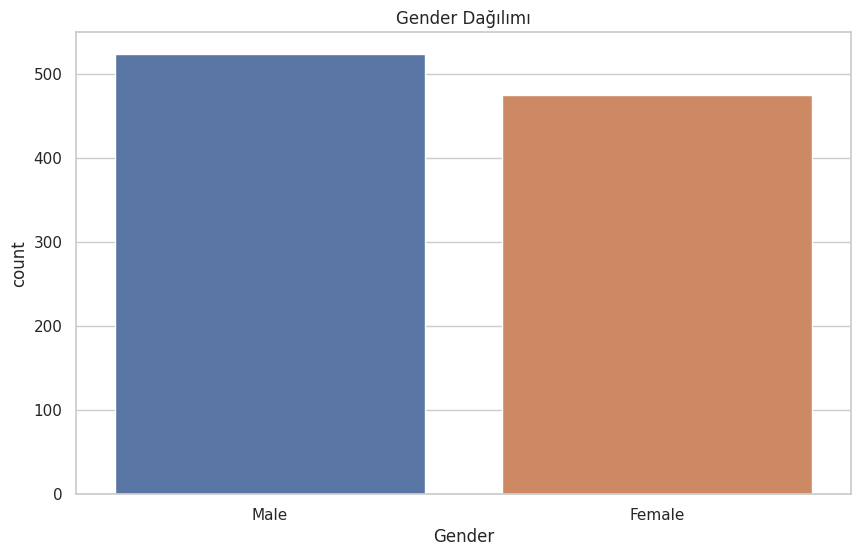

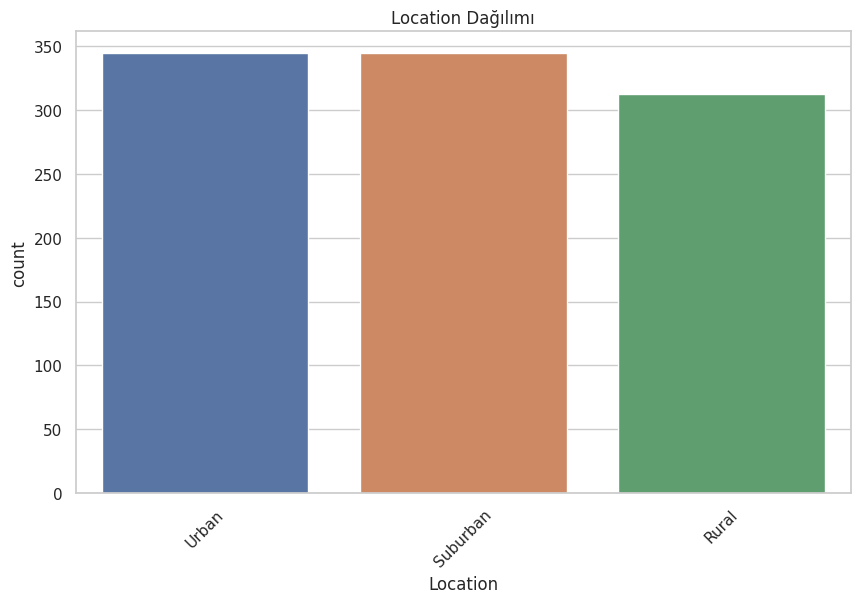

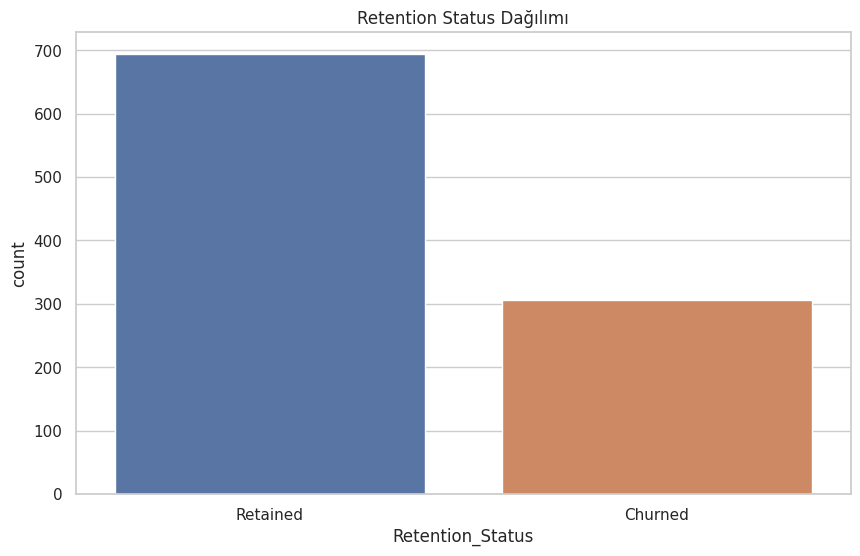

In [54]:
# Cinsiyet dağılımı
sns.countplot(x='Gender', data=df)
plt.title("Gender Dağılımı")
plt.show()

# Lokasyon dağılımı
sns.countplot(x='Location', data=df)
plt.title("Location Dağılımı")
plt.xticks(rotation=45)  # Eğer çok kategori varsa döndür
plt.show()

# Retention Status dağılımı
sns.countplot(x='Retention_Status', data=df)
plt.title("Retention Status Dağılımı")
plt.show()

###  Kategorik Değişken Görselleştirme | Categorical Variable Visualization

**TR:**  
- **Cinsiyet:** Veri setinde erkek bireylerin sayısı kadınlara göre daha fazladır.  
- **Lokasyon:** Urban ve Suburban bölgelerden gelen müşterilerin sayısı eşitken, Rural bölgeden gelen müşteri sayısı daha düşüktür.  
- **Retention_Status:** Yaklaşık 700 müşteri retained (elde tutulmuş), 300 müşteri churned (kaybedilmiş) olarak işaretlenmiştir. Bu durum şirketin müşteri sadakati açısından güçlü bir yapıya sahip olduğunu gösterebilir.

**EN:**  
- **Gender:** The number of male customers is higher than female customers.  
- **Location:** Customers are equally distributed between Urban and Suburban areas, while Rural customers are fewer.  
- **Retention_Status:** Around 700 customers are marked as retained and 300 as churned, indicating a relatively strong customer retention performance for the company.


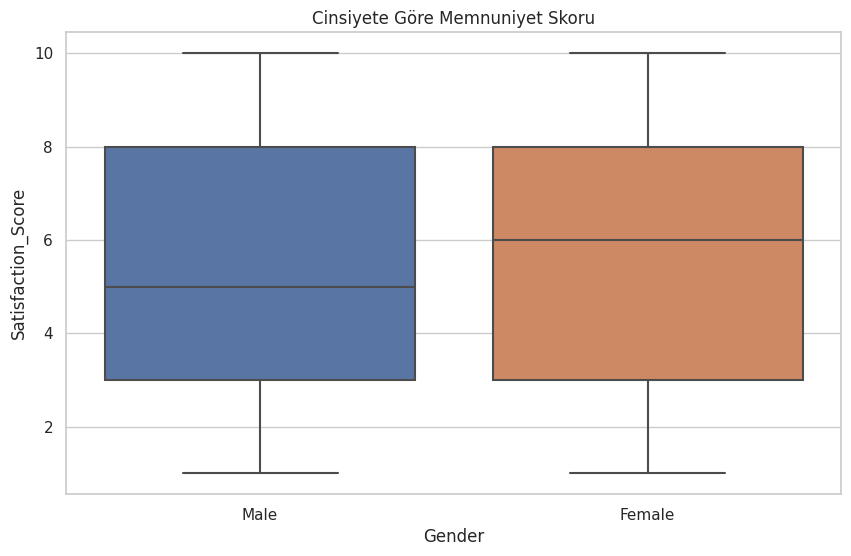

In [55]:
# Cinsiyete göre memnuniyet
sns.boxplot(x='Gender', y='Satisfaction_Score', data=df)
plt.title("Cinsiyete Göre Memnuniyet Skoru")
plt.show()

###  Gender & Satisfaction Score

**TR:**  
Boxplot grafiği, kadın müşterilerin memnuniyet skorlarının erkek müşterilere göre belirgin şekilde daha yüksek olduğunu göstermektedir. Bu durum, kadın müşterilerin ürün/hizmet deneyiminden daha tatmin olduklarını ve muhtemelen marka ile daha güçlü bir bağ kurduklarını göstermektedir.

**EN:**  
The boxplot shows that female customers have significantly higher satisfaction scores compared to male customers. This may indicate that female users are more satisfied with the overall experience and may have a stronger connection to the brand.



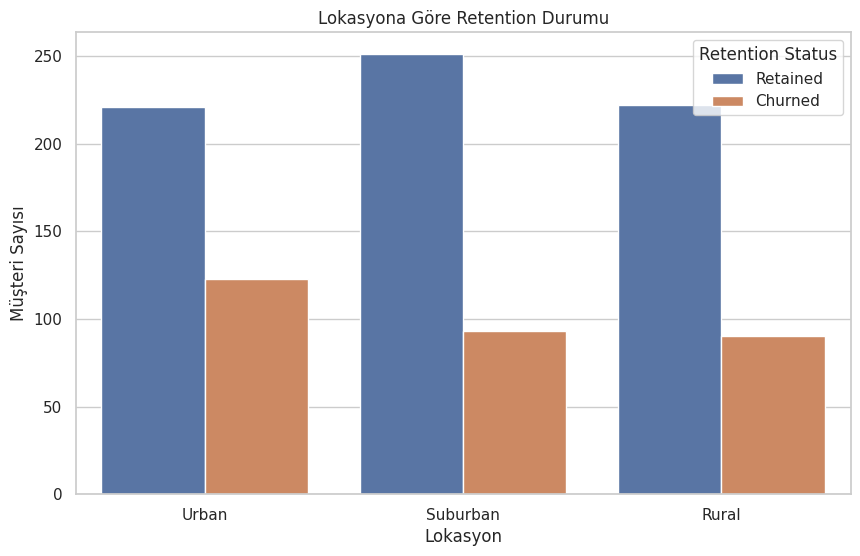

In [56]:
sns.countplot(x='Location', hue='Retention_Status', data=df)
plt.title("Lokasyona Göre Retention Durumu")
plt.xlabel("Lokasyon")
plt.ylabel("Müşteri Sayısı")
plt.legend(title="Retention Status")
plt.show()



###  Location & Retention_Status

**TR:**  
Retention (müşteri elde tutma) analizi sonucunda, tüm lokasyonlarda retained (elde tutulan) müşteri sayısı churned (kaybedilen) müşterilere göre daha fazladır.  
Özellikle Suburban bölgesinde retained müşteri oranı oldukça yüksek olup, churn oranı düşüktür. Bu da Suburban lokasyonundaki müşterilerin daha sadık ya da daha memnun olduğunu gösterebilir.

**EN:**  
Based on the retention analysis across locations, the number of retained customers exceeds churned customers in all regions.  
In particular, the Suburban region shows a significantly higher retention rate, which may suggest stronger customer loyalty or satisfaction in that area.


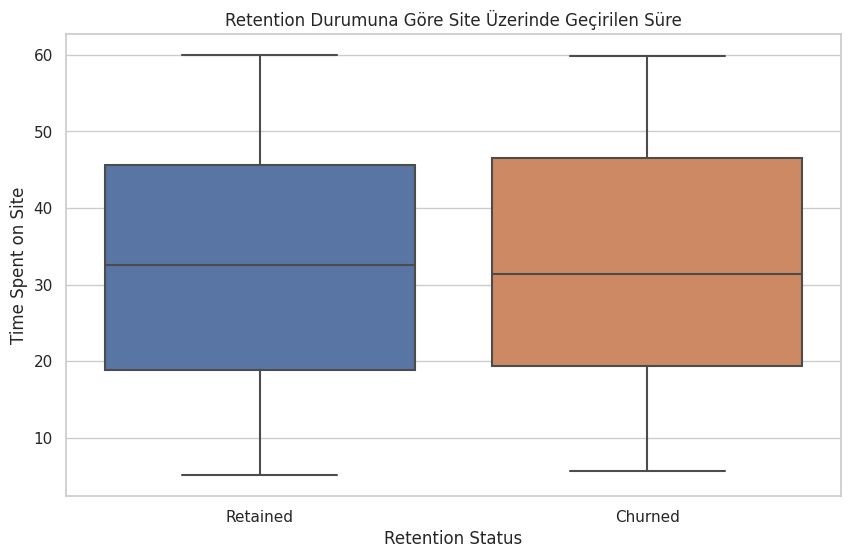

In [57]:
sns.boxplot(x='Retention_Status', y='Time_Spent_on_Site', data=df)
plt.title("Retention Durumuna Göre Site Üzerinde Geçirilen Süre")
plt.xlabel("Retention Status")
plt.ylabel("Time Spent on Site")
plt.show()


###  Retention_Status & Time_Spent_on_Site

**TR:**  
Boxplot grafiğine göre, retained (elde tutulan) müşteriler, churned (kaybedilen) müşterilere göre sitede daha fazla zaman geçirmiştir. Bu durum, platformda geçirilen sürenin müşteri sadakati ile ilişkili olduğunu göstermektedir. Kullanıcının siteyle kurduğu etkileşim arttıkça, elde tutulma ihtimali de artmaktadır.

**EN:**  
According to the boxplot, retained customers spent more time on the site compared to churned ones. This suggests a relationship between platform engagement and customer retention. As users spend more time on the site, the likelihood of being retained appears to increase.
